## 계산 그래프
계산 과정을 그래프로 나타낸 것

1. 계산 그래프를 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.
- 계산을 왼쪽에서 오른쪽으로 진행하는 단계: 순전파
- 오른쪽에서 왼쪽의 전파: 역전파


### 국소적 계산
- 국소적: 자신과 직접 관계된 작은 범위
- 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있음.

## 연쇄법칙

여러함수로 구성된 합성 함수의 미분에 대한 성질

- 연쇄법칙은 합성 함수의 미분에 대한 성질이며, 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있음.

### 덧셈 노드의 역전파
z = x + y

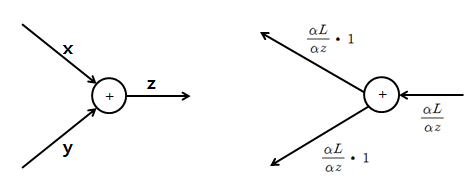

역전파 때는 상류에서 정해진 미분에 1을 곱하여 하류로 흘림. 즉, 덧셈 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게 됨.

- 최종 출력으로 가는 계산의 중간에 덧셈 노드가 존재한다. 역전파에서는 국소적 미분이 가장 오른쪽의 ㅜㄹ령게서 시작하여 노드를 타고 역방향으로 전파된다.

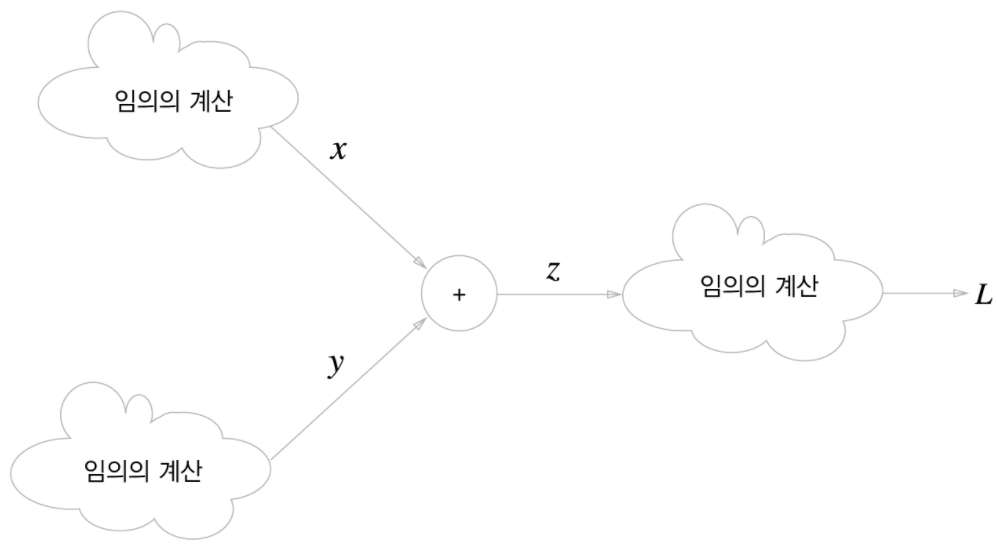

### 곱셈 노드의 역전파
z = xy

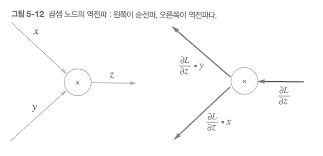

- 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보냄.
- 서로 바꾼 값이란 순전파 때 x였다면 역전파에서는 y, 순전파 때 y였다면 역전파에서 x로 바꾼다는 의미.

## 담순한 계층 구현하기

### 곱셈 계층
모든 계층은 forward()와 backward() 라는 공통의 메서드(인터페이스)를 갖도록 구현할 것입니다. forward()는 순전파, backward()은 역전파를 처리합니다.

In [1]:
# 곱셈 계층
class MulLayer:
  def __init__(self):       # x와 y 초기화, 순전파 시의 입력값 유지 위해 사용
    self.x = None
    self.y = None

  def forward(self, x, y):  # x와 y를 인수로받고 두 값을 곱해서 반환
    self.x = x
    self.y = x
    out = x * y

    return out

  def backward(self, dout):
    dx = dout * self.y      # x와 y를 바꿈
    dy = dout * self.x

    return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

20000 20000 200


### 덧셈 계층

In [4]:
class AddLayer:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
65000 65000 97500 97500 650


## 활성화 함수 계층 구현하기

### ReLU 계층

ReLU 수식

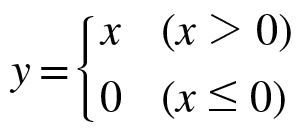

x에 대한 y의 미분

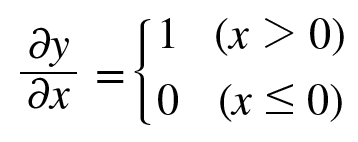

순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘림. 반면, 순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않음.(0을 보냄)


[ReLU 계층의 계산 그래프]

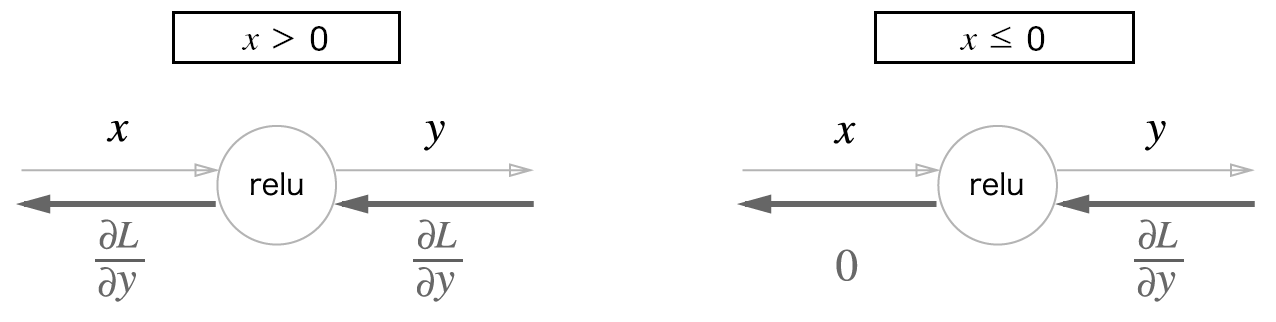

In [6]:
# ReLU 계층 구현
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return x

In [7]:
import numpy as np

x = np.array( [[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### Sigmoid 계층

[Sigmoid 계층의 계산 그래프(순전파)]

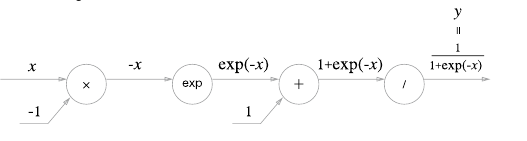

[Sigmoid 함수 역전파]

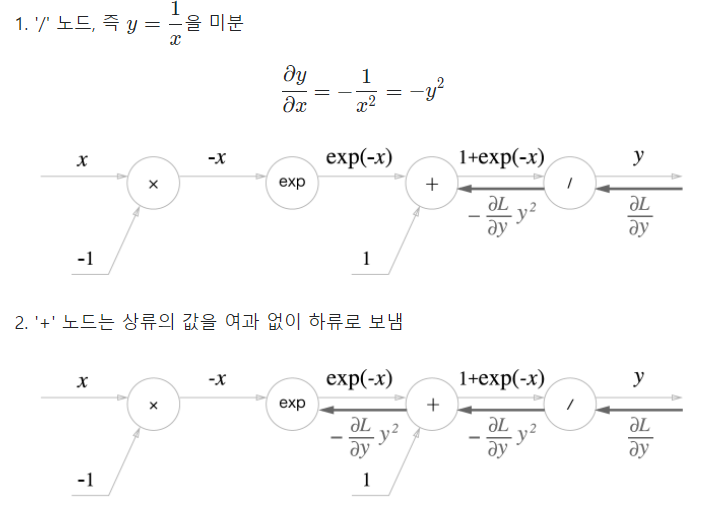

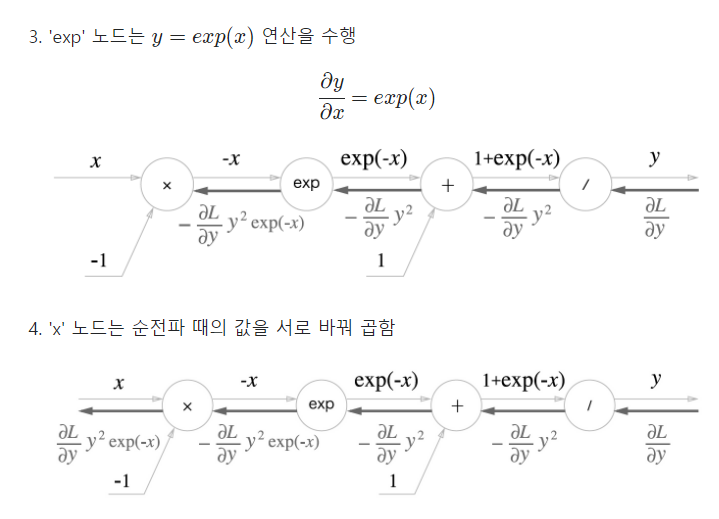

위의 과정을 모두 묶어 sigmoid 노드 하나로 대체 가능

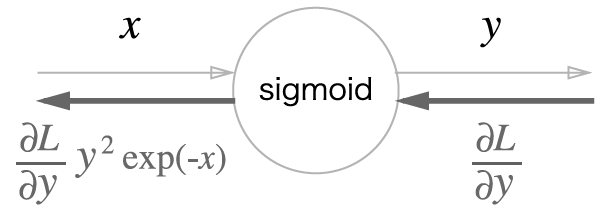

In [8]:
# Sigmoid 구현

class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

## Affine/Softmax 계층 구현하기

### Affine 계층
신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서 어파인 변환(Affine transformatione)이라고 함.

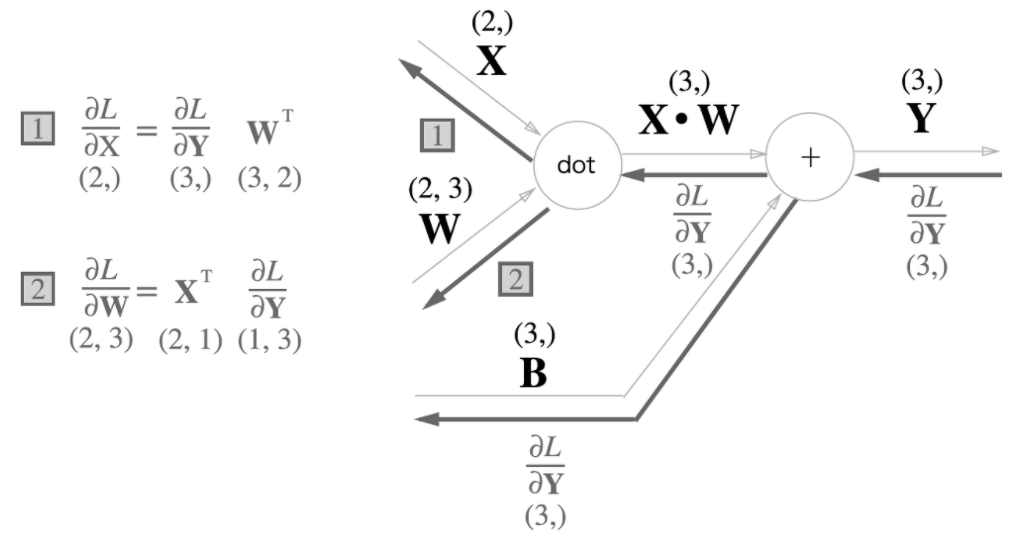


X, W, B의 행렬 흐름.


### 배치용 Affine 계층

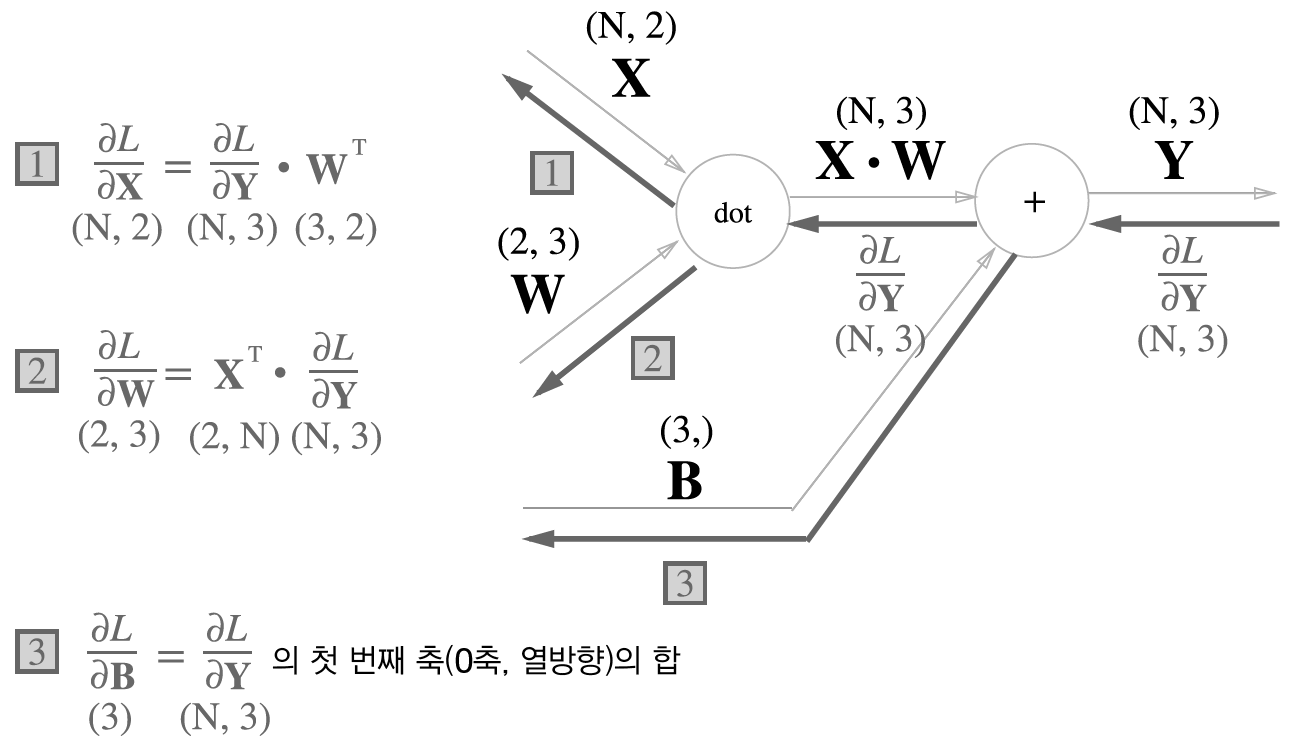

In [9]:
# 배치용 Affine 계층 구체적인 예
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])
print(X_dot_W)
print(X_dot_W + B)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [10]:
# 순전파의 편향 덧셈은 각각의 데이터에 더해짐.
# 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 함.

dY = np.array([[1,2,3],[4,5,6]])
print(dY)
dB = np.sum(dY, axis = 0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


In [11]:
# Affine 구현
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)

    return dx

### Softmax-with-Loss 계층

소프트맥스 함수는 입력 값을 정규화하여 출력함.

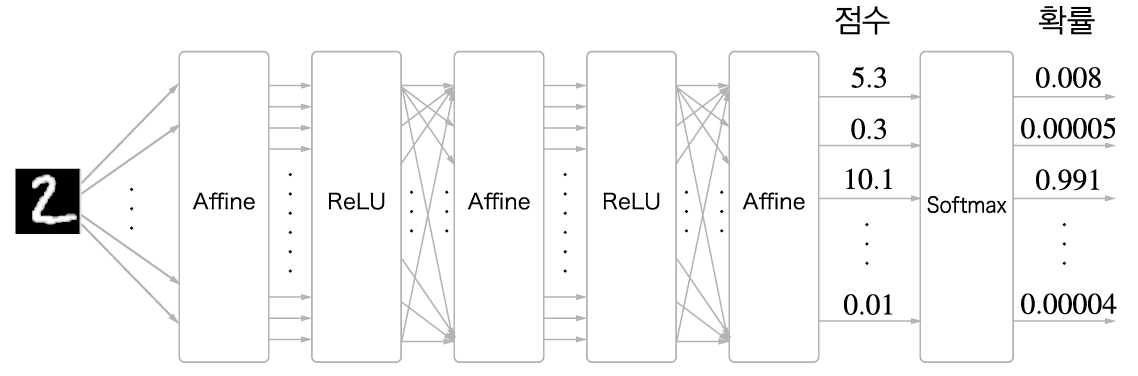

손실 함수인 교차 엔트로피 오차도 포함하여 'Softmax-with-Loss 계층'이라는 이름으로 구현함.

[Softmax-with-Loss 계층의 계산 그래프]

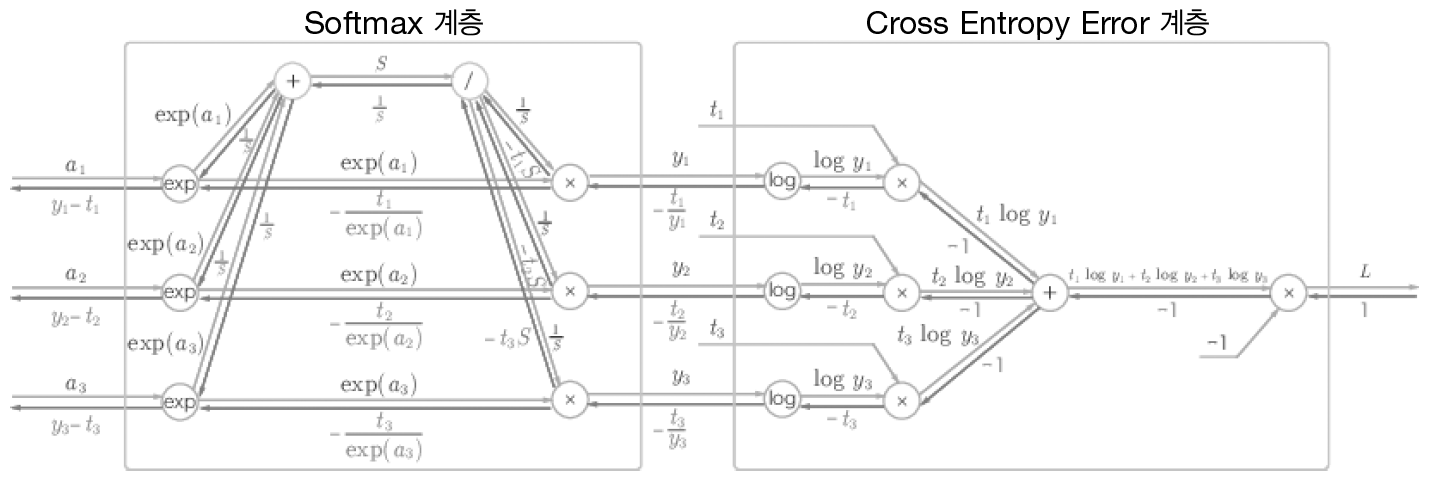

[간소화한 Softmax-with-Loss 계층의 계산 그래프]

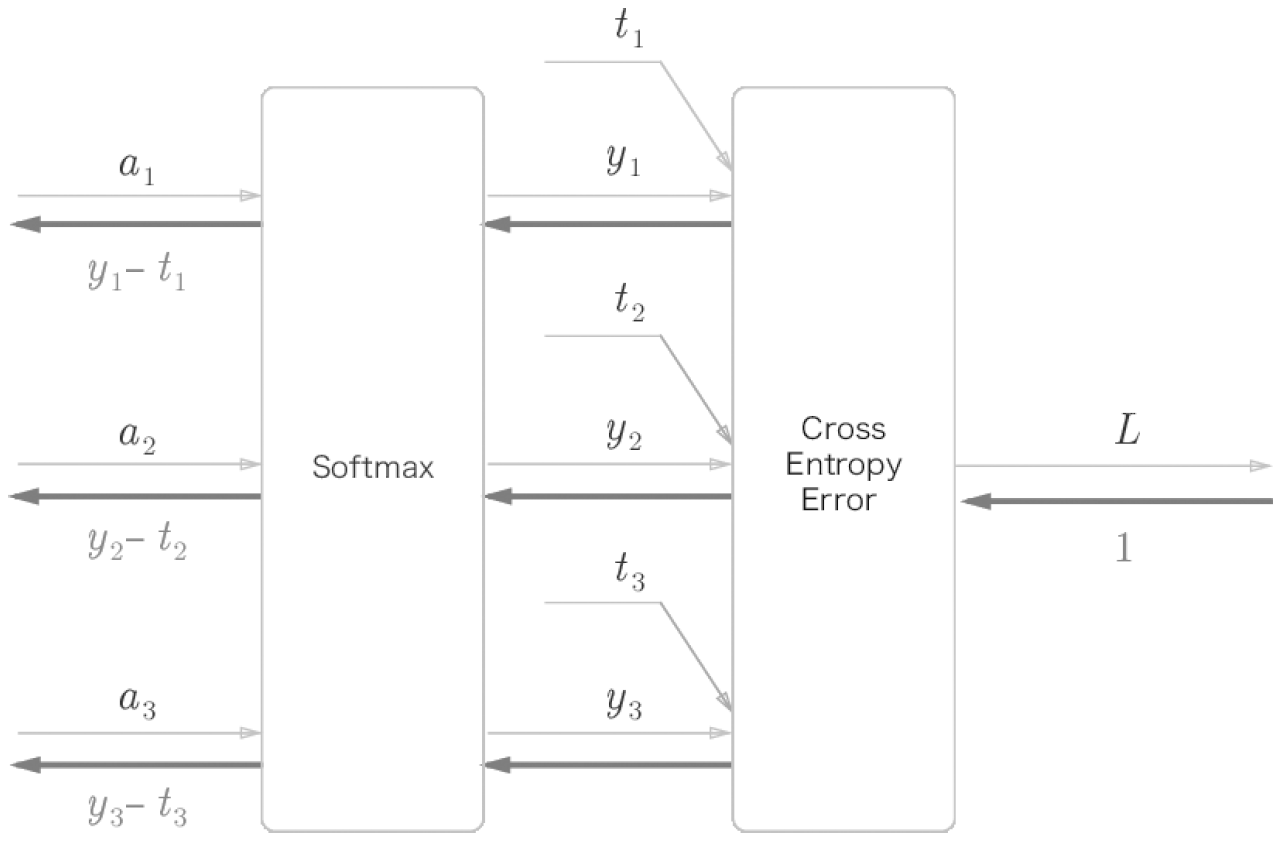

In [12]:
# Softmax-with-Loss 계층 구현
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None  # 손실
    self.y = None     # softmax의 출력
    self.t = None     # 정답 레이블(원-핫 벡터)

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = corss_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size

    return dx

## 오차역전파법 구현하기

### 신경망 학습의 전체 그림
#### 신경망 학습의 순서

- 전제
  - 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행합니다.

- 1단계: 미니배치
  - 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.

- 2단계: 기울기 산출
  - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 소실 함수의 값을 가장 작게 하는 방향을 제시합니다.

- 3단계: 매개변수 갱신
  - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.

- 4단계: 반복
  - 1~3단계를 반복합니다.

* 오차 역전파법이 등장하는 단계는 두번째인 '기울기 산출'입니다.

### 오차역전파법을 적용한 신경망 구현하기

2층 신경망을 TwoLayerNet 클래스로 구현합니다.

#### TwoLayerNet 클래스의 인스턴스 변수
- params
  1. 딕셔너리 변수로, 신경망의 매개변수를 보관
  2. params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향
  3. params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향

- layers
  1. 순서가 있는 딕셔너리 변수로, 신경망의 계층을 보관
  2, layers['Affine1'],ayers['Relu1'],layer['Affine2']와 같이 각 계층을 순서대로 유지

- lastLayer
  1. 신경망의 마지막 계층
  2. 이 예에서는 SoftmaxWithLoss 계층

#### TwoLayerNet 클래스의 메서드
- \__init__\(self. input_size, hidden_size, output_size, weight_init_std)
  1. 초기화를 수행한다.
  2. 인수는 앞에서부터 입력층 뉴런 수, 은릭층 뉴런 수, 출력층 뉴런 수, 가중치 초기화 시 정규분포의 스케일

- predict(self, x)
  1. 예측(추론)을 수행한다.
  2. 인수 x는 이미지 데이터

- loss(self, x, t)
  1. 손실 함수의 값을 구한다.
  2. 인수 x는 이미지 데이터, t는 정답 레이블

- accuracy(self, x, t) : 정확도를 구한다.
- numerical_gradient(self, x, t) : 가중치 매개변수의 기울기를 수치 미분 방식으로 구한다.
- gradient(self, x, t): 가중치 매개변수의 기울기를 오차역전파법으로 구한다.

In [13]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝


In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common_layers import *
from common_gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
  
  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    # 계층 생성
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    
    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    if t.ndim != 1:
      t = np.argmax(t, aixs = 1)
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads

  def gradient(self, x, t):
    # 순전파
    self.loss(x, t)

    # 역전파
    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
    return grads

### 오차역전파법으로 구한 기울기 검증하기

In [15]:
# 기울기 확인
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist
from two_layer_net_upgrade import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(f'{key}: {diff}')

# 오차 수치가 매우 작으므로 오차역전파법으로 구현한 기울기를 실수없이 구현해냄.

W1: 3.877678837664857e-10
b1: 2.404053409935016e-09
W2: 4.137311604506492e-09
b2: 1.3975200895965934e-07


### 오차역전파법을 사용한 학습 구현하기

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist
from two_layer_net_upgrade import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 오차역전파법으로 기울기를 구한다.
  grad = network.gradient(x_batch, t_batch)

  # 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(train_acc, test_acc)

0.09775 0.0942
0.9047333333333333 0.9091
0.9239833333333334 0.928
0.9384333333333333 0.9378
0.9451 0.9436
0.94965 0.9487
0.9542666666666667 0.9522
0.9590666666666666 0.9561
0.9631666666666666 0.9568
0.9658333333333333 0.9606
0.9675166666666667 0.9617
0.9706166666666667 0.963
0.9712833333333334 0.9639
0.9733833333333334 0.9651
0.9745166666666667 0.9659
0.9743333333333334 0.9667
0.9770833333333333 0.9679


## 정리

- 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다.
- 계산 그래프의 순전파는 통상의 계산을 수행한다. 한편, 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다.(오차역전파법)
- 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다.(기울기 확인)